# Data Prediction and Machine Learning

### Data Prediction

1.  **Time Series Forecasting:**
    
    *   **ARIMA (AutoRegressive Integrated Moving Average):** For forecasting future values of each variable based on its own past values.
    *   **SARIMA (Seasonal ARIMA):** An extension of ARIMA that supports univariate time series data with a seasonal component.
    *   **Prophet:** Developed by Facebook, it's useful for forecasting with daily observations that display patterns on different time scales.
2.  **Machine Learning Models:**
    
    *   **Regression Models:** Linear Regression, Polynomial Regression for predicting continuous values.
    *   **Random Forest and Gradient Boosting Machines (GBM):** For capturing non-linear relationships in the data.
    *   **Neural Networks:** LSTM (Long Short-Term Memory) networks are especially good for sequences like time series.
3.  **Multivariate Time Series Forecasting:**
    
    *   **Vector AutoRegression (VAR):** Models the relationship between multiple variables and their lagged values.
    *   **Multivariate LSTM:** A deep learning approach to handle multiple inputs for forecasting.
4.  **Evaluation:**
    
    *   Use metrics like MAE (Mean Absolute Error), RMSE (Root Mean Square Error), and MAPE (Mean Absolute Percentage Error) to evaluate the performance of your forecasting models.

### Tools and Libraries

*   **Pandas:** For data manipulation and analysis.
*   **NumPy:** For numerical computations.
*   **Matplotlib** and **Seaborn:** For data visualization.
*   **Statsmodels:** For implementing statistical models.
*   **Scikit-learn:** For machine learning models.
*   **TensorFlow** or **Keras:** For deep learning models.

### Steps to Get Started

1.  **Preprocess the Data:** Clean the data by handling missing values, outliers, and normalizing or standardizing the values if necessary.
2.  **Perform EDA:** Use visualization and statistical analysis to understand the data.
3.  **Model Selection:** Based on EDA, choose appropriate models for forecasting.
4.  **Model Training:** Train the model on historical data.
5.  **Model Evaluation:** Evaluate the model's performance using appropriate metrics.
6.  **Forecasting:** Use the model to make predictions.

In [1]:
# Helper Function
# Code to check if seaborn is installed and install it via pip if it is not installed
import subprocess
import pkg_resources
import sys

def install_package(package_name):
    try:
        # Check if the package is already installed
        pkg_resources.get_distribution(package_name)
        print(f"{package_name} is already installed.")
    except pkg_resources.DistributionNotFound:
        # If the package is not installed, install it using pip
        print(f"{package_name} is not installed, installing now...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"{package_name} has been successfully installed.")


In [4]:
install_package('seaborn')
install_package('statsmodels')
install_package('prophet')
install_package('matplotlib')

seaborn is already installed.
statsmodels is already installed.
prophet is already installed.
matplotlib is already installed.


### 1\. ARIMA Forecasting

To forecast using ARIMA, call arima_forecast('data01.csv', 'Temperature', (p,d,q)) where (p,d,q) are the ARIMA model parameters for the Temperature variable.

In [29]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def arima_forecast(filename, variable, order):
    df = pd.read_csv(filename, parse_dates=['Lastupdatetime'], dayfirst=True)
    df.set_index('Lastupdatetime', inplace=True)
    df.index = pd.DatetimeIndex(df.index).to_period('h')  
    
    model = ARIMA(df[variable], order=order)
    model_fit = model.fit()
    
    df['forecast'] = model_fit.predict(start=len(df), end=len(df)+5, dynamic=True)
    df[[variable, 'forecast']].plot(figsize=(12, 8))
    
    plt.title(f'ARIMA Forecast for {variable}')
    plt.show()
    return df['forecast']

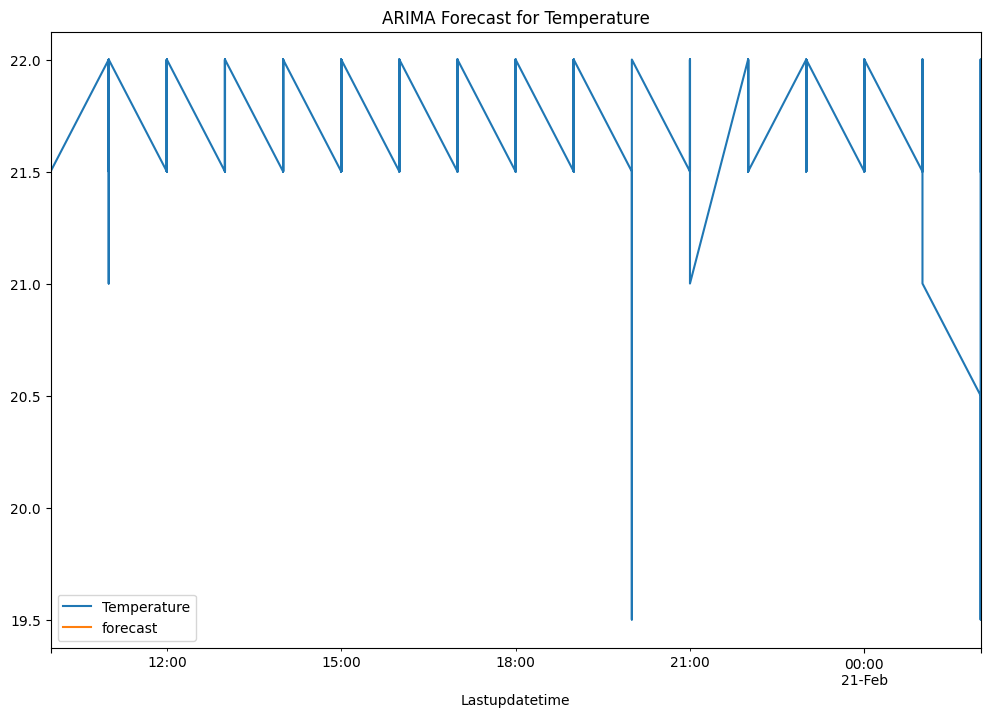

In [30]:
# arima_forecast('data01.csv', 'Temperature', (p,d,q))
forecast = arima_forecast('data02.csv', 'Temperature', (1,1,1))
# arima_forecast('linear_increase.csv', 'Temperature', (1, 1, 1))

In [31]:
forecast

Lastupdatetime
2024-02-20 10:00   NaN
2024-02-20 10:00   NaN
2024-02-20 10:00   NaN
2024-02-20 10:00   NaN
2024-02-20 11:00   NaN
                    ..
2024-02-21 02:00   NaN
2024-02-21 02:00   NaN
2024-02-21 02:00   NaN
2024-02-21 02:00   NaN
2024-02-21 02:00   NaN
Freq: h, Name: forecast, Length: 99, dtype: float64

### 2\. SARIMA Forecasting

For SARIMA, use sarima_forecast('data01.csv', 'Temperature', (p,d,q), (P,D,Q,s)) where (P,D,Q,s) are the seasonal components of the SARIMA model.

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
def sarima_forecast(filename, variable, order, seasonal_order):
    df = pd.read_csv(filename, parse_dates=['Lastupdatetime'], dayfirst=True)
    df.set_index('Lastupdatetime', inplace=True)
    
    model = SARIMAX(df[variable], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    
    df['forecast'] = model_fit.predict(start=len(df), end=len(df)+5, dynamic=True)
    df[[variable, 'forecast']].plot(figsize=(12, 8))
    
    plt.title(f'SARIMA Forecast for {variable}')
    plt.show()
    return df['forecast']

D:\soch1\Projects\IoT_course\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\soch1\Projects\IoT_course\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\soch1\Projects\IoT_course\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\soch1\Projects\IoT_course\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will resu

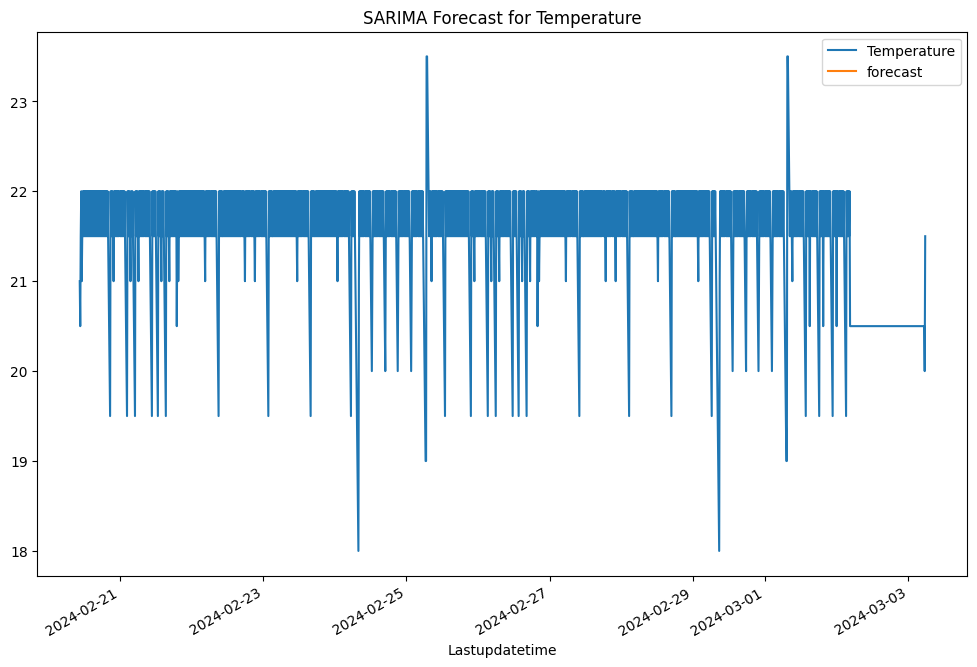

Lastupdatetime
2024-02-20 10:34:00   NaN
2024-02-20 10:34:00   NaN
2024-02-20 10:44:00   NaN
2024-02-20 10:54:00   NaN
2024-02-20 11:04:00   NaN
                       ..
2024-03-02 05:04:00   NaN
2024-03-03 05:14:00   NaN
2024-03-03 05:24:00   NaN
2024-03-03 05:34:00   NaN
2024-03-03 05:44:00   NaN
Name: forecast, Length: 1557, dtype: float64

In [42]:
#sarima_forecast('data01.csv', 'Temperature', (p,d,q), (P,D,Q,s))
sarima_forecast('data01.csv', 'Temperature', (1, 1, 1), (1, 1, 1, 7))

In [43]:
forecast

Lastupdatetime
2024-02-20 10:00   NaN
2024-02-20 10:00   NaN
2024-02-20 10:00   NaN
2024-02-20 10:00   NaN
2024-02-20 11:00   NaN
                    ..
2024-02-21 02:00   NaN
2024-02-21 02:00   NaN
2024-02-21 02:00   NaN
2024-02-21 02:00   NaN
2024-02-21 02:00   NaN
Freq: h, Name: forecast, Length: 99, dtype: float64

### 3\. Prophet Forecasting

In [34]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [35]:
def prophet_forecast(filename, variable):
    df = pd.read_csv(filename, usecols=['Lastupdatetime', variable])
    df.rename(columns={'Lastupdatetime': 'ds', variable: 'y'}, inplace=True)
    
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    
    future = m.make_future_dataframe(periods=5)
    forecast = m.predict(future)
    
    fig = m.plot(forecast)
    plt.title(f'Prophet Forecast for {variable}')
    plt.show()

D:\soch1\Projects\IoT_course\.venv\lib\site-packages\prophet\forecaster.py:1133: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
D:\soch1\Projects\IoT_course\.venv\lib\site-packages\prophet\forecaster.py:287: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])
23:42:52 - cmdstanpy - INFO - Chain [1] start processing
23:42:53 - cmdstanpy - INFO - Chain [1] done processing
D:\soch1\Projects\IoT_course\.venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. 

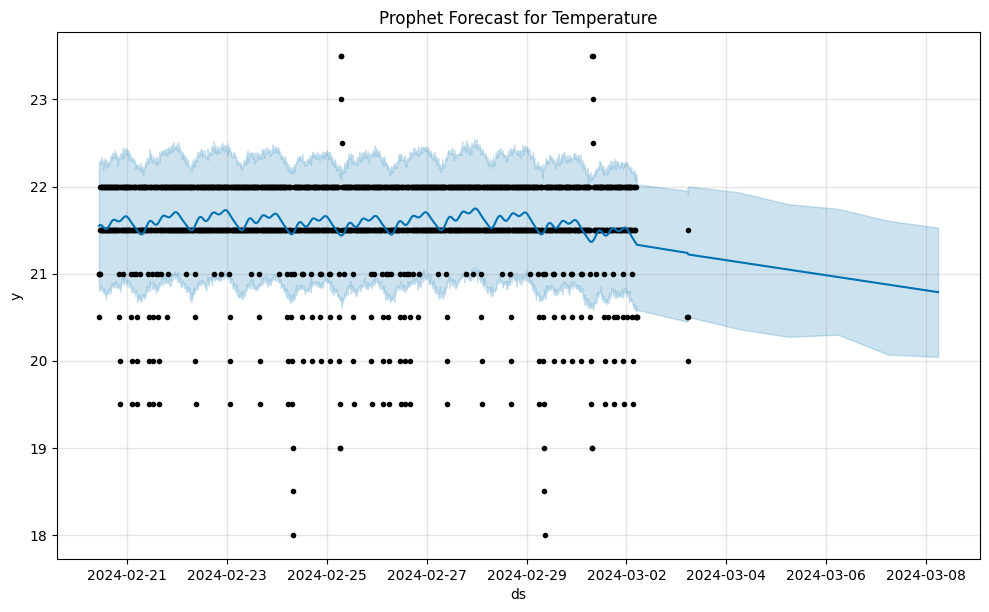

In [36]:
prophet_forecast('data01.csv', 'Temperature')